# Investigate Training Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import os

# Import ML tools
module_path = '/home/russbate/MLPionCollaboration/LCStudies/'
import sys
sys.path.append(module_path)
from util import resolution_util as ru
from util import plot_util as pu
from util import deep_set_util as dsu

## Import History

In [27]:
cwd = os.getcwd()
print(cwd)

with open(cwd+'/results/history_PFN_base_LR--1e-03_BS--2000_EP--800_EV--200000_2022'+\
          '-02-13.pickle', 'rb') as pfn_base_histFile:
    PFN_base_hist = pickle.load(pfn_base_histFile)
    
with open(cwd+'/results/history_PFN_wDropout_STMC_--LR_3e-03--BS_1500--EP_800--EV_200000--2022'+\
          '-02-15.pickle', 'rb') as pfn_wDropout_histFile:
    PFN_wDropout_hist = pickle.load(pfn_wDropout_histFile)

with open(cwd+'/results/history_PFN_wTNet_LR--1e-03_BS--2000_EP--800_EV--200000_2022'+\
          '-02-13.pickle', 'rb') as pfn_wTNet_histFile:
    PFN_wTNet_hist = pickle.load(pfn_wTNet_histFile)

type(PFN_base_hist)
print(PFN_base_hist.keys())

/home/russbate/MLPionCollaboration/LCStudies/regression
dict_keys(['loss', 'val_loss'])


## Plot History

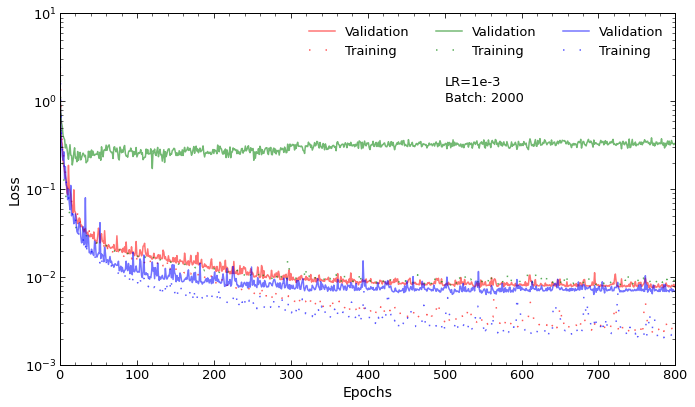

In [28]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_base_hist['val_loss'], label="Validation", color='red',
         ls='solid', alpha=.55)
plt.plot(PFN_base_hist['loss'], label="Training", color='red',
         ls=(0, (1, 10)), alpha=.65)
plt.plot(PFN_wDropout_hist['val_loss'], label="Validation", color='green',
         ls='solid', alpha=.55)
plt.plot(PFN_wDropout_hist['loss'], label="Training", color='green',
         ls=(0, (1, 10)), alpha=.65)
plt.plot(PFN_wTNet_hist['val_loss'], label="Validation", color='blue',
         ls='solid', alpha=.55)
plt.plot(PFN_wTNet_hist['loss'], label="Training", color='blue',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.001,10)
plt.yticks(fontsize=13)
plt.xlim(0,800)
plt.xticks(fontsize=13)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=3)
plt.text(500, 1.5, 'LR=1e-3', fontsize=13)
plt.text(500, 1, 'Batch: 2000', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/February22/STMC_ModelComparison_'+\
#             'lossCurves_2000batch_LR1e-3_2022-02-15.png', format='png')
plt.show()

## Import Target vs Predictions Results

In [4]:
tpreds_PFN_base = np.load('results/target_preds_PFN_base_LR--1e-03_BS--2000_EP'+\
                          '--800_EV--200000_2022-02-13.npz')
tpreds_PFN_wDropout = np.load('results/target_preds_PFN_wDropout_LR--1e-03_BS--1000_EP'+\
                          '--800_EV--200000_2022-02-13.npz')
tpreds_PFN_wTNet = np.load('results/target_preds_PFN_wTNet_LR--1e-03_BS--2000_EP'+\
                          '--800_EV--200000_2022-02-13.npz')

In [5]:
## PFN BASE
print(tpreds_PFN_base['kwds'])
PFN_base_target = tpreds_PFN_base['args'][0]
PFN_base_preds = tpreds_PFN_base['args'][1]

## PFN WDROPOUT
PFN_wDropout_target = tpreds_PFN_wDropout['args'][0]
PFN_wDropout_preds = tpreds_PFN_wDropout['args'][1]

## PFN WDROPOUT
PFN_wTNet_target = tpreds_PFN_wTNet['args'][0]
PFN_wTNet_preds = tpreds_PFN_wTNet['args'][1]

['target' 'prediction']


### Make List of Results

In [6]:
targs = [PFN_base_target, PFN_wDropout_target, PFN_wTNet_target]
preds = [PFN_base_preds, PFN_wDropout_preds, PFN_wTNet_preds]

xList = []
yList = []
for pi, ti in zip(preds, targs):
    xList.append(np.exp(ti))
    yList.append(np.exp(pi)/np.exp(ti))

print(len(xList))
print(len(yList))

3
3


In [7]:
respColors = ['red', 'green', 'blue']
respLabels = ['Base', 'Dropout', 'TNet']

print(np.any(len(xList) != np.array([len(yList), len(respColors), len(respLabels)])))

False


### Plot Results

<Figure size 799.992x599.976 with 0 Axes>

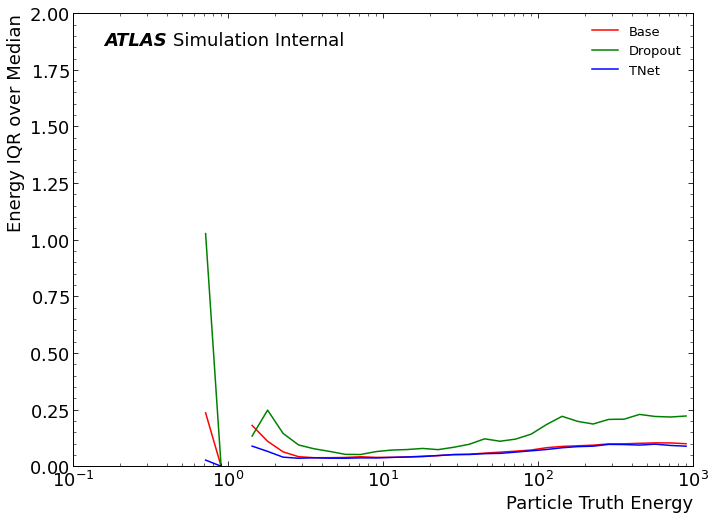

In [18]:
# filedest = 'Regression_Plots/February22/STMC_ModelComparison_'+\
#                     'IQRovMed_2000batch_LR1e-3_2022-02-15.png'
filedest=''
resp_plot = ru.resolutionPlot(x=xList,
                    y=yList,
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy', ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=respColors,
                             labels=respLabels)

# EM versus nonEM

In [29]:
with open('results/history_PFN_base_wEM_PIPM--LR_3e-03--BS_1600--EP_300'+\
          '--EV_200000--2022-02-15.pickle', 'rb') as pfn_em_histFile:
    PFN_EM_hist = pickle.load(pfn_em_histFile)
    
with open('results/history_PFN_base_noEM_PIPM--LR_3e-03--BS_1600--EP_300'+\
          '--EV_200000--2022-02-15.pickle', 'rb') as pfn_noem_histFile:
    PFN_noEM_hist = pickle.load(pfn_noem_histFile)

## Plot Loss Curves

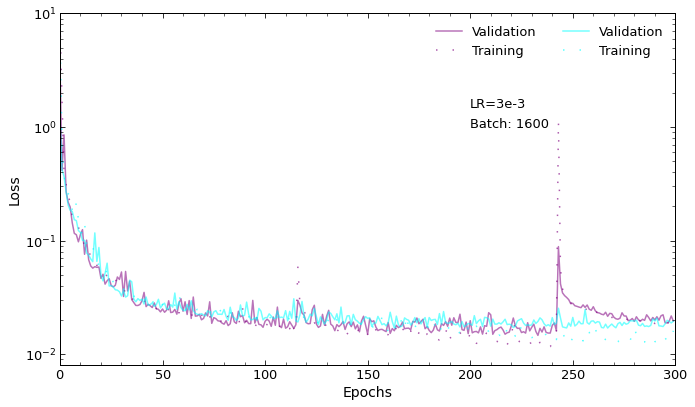

In [39]:
fig = plt.figure(figsize=(10,6))
plt.plot(PFN_EM_hist['val_loss'], label="Validation", color='purple',
         ls='solid', alpha=.55)
plt.plot(PFN_EM_hist['loss'], label="Training", color='purple',
         ls=(0, (1, 10)), alpha=.65)
plt.plot(PFN_noEM_hist['val_loss'], label="Validation", color='cyan',
         ls='solid', alpha=.55)
plt.plot(PFN_noEM_hist['loss'], label="Training", color='cyan',
         ls=(0, (1, 10)), alpha=.65)

plt.yscale('log')
plt.ylim(.008,10)
plt.yticks(fontsize=13)
plt.xlim(0,300)
plt.xticks(fontsize=13)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', ncol=2)
plt.text(200, 1.5, 'LR=3e-3', fontsize=13)
plt.text(200, 1, 'Batch: 1600', fontsize=13)
plt.tight_layout()
# plt.savefig('Regression_Plots/February22/PIPM_EMComparison_'+\
#             'lossCurves_1600batch_LR3e-3_2022-02-15.png', format='png')
plt.show()

## Targets vs Predictions

In [33]:
tpreds_PFN_EM = np.load('results/target_preds_PFN_base_noEM_PIPM--LR_3e-03'+\
                          '--BS_1600--EP_300--EV_200000--2022-02-15.npz')
tpreds_PFN_noEM = np.load('results/target_preds_PFN_base_noEM_PIPM--LR_3e-03'+\
                          '--BS_1600--EP_300--EV_200000--2022-02-15.npz')

In [34]:
## PFN BASE
print(tpreds_PFN_base['kwds'])
PFN_EM_target = tpreds_PFN_base['args'][0]
PFN_EM_preds = tpreds_PFN_base['args'][1]

## PFN WDROPOUT
PFN_noEM_target = tpreds_PFN_wDropout['args'][0]
PFN_noEM_preds = tpreds_PFN_wDropout['args'][1]

['target' 'prediction']


### Resolution Plot

In [35]:
targs2 = [PFN_EM_target, PFN_noEM_target]
preds2 = [PFN_EM_preds, PFN_noEM_preds]

xList2 = []
yList2 = []
for pi, ti in zip(preds2, targs2):
    xList2.append(np.exp(ti))
    yList2.append(np.exp(pi)/np.exp(ti))

In [36]:
respColors2 = ['purple', 'cyan']
respLabels2 = ['EM', 'noEM']

<Figure size 799.992x599.976 with 0 Axes>

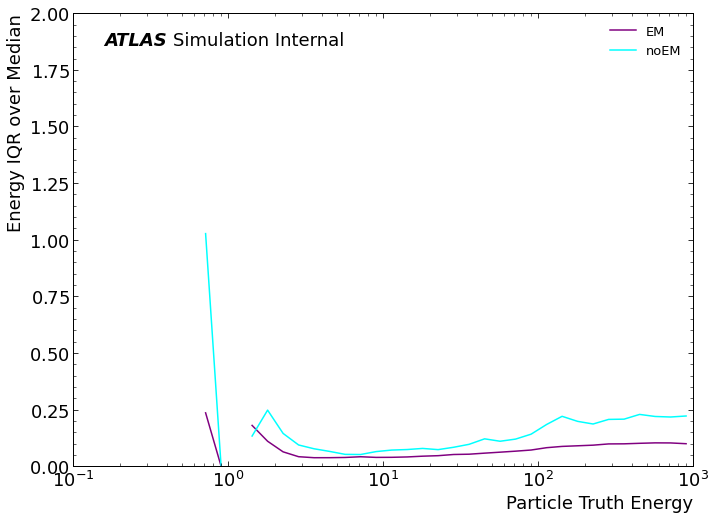

In [40]:
# filedest = 'Regression_Plots/February22/PIPM_EMComparison_'+\
#             'IQRoverMed_1600batch_LR3e-3_2022-02-15.png'
filedest=''
resp_plot = ru.resolutionPlot(x=xList2,
                    y=yList2,
                    figfile=filedest,
                    statistic='iqrOverMed', xlabel='Particle Truth Energy', ylabel='Energy IQR over Median',
                    atlas_x=.05, atlas_y=.96, simulation=True,
                    textlist=[], colors=respColors2,
                             labels=respLabels2)